## Eval Initial loss func differences

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%autoreload

In [3]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import segmentation_models_pytorch as smp
from natsort import natsorted
from uloss_wmh.fitting.fitter import StandardLitModelWrapper
from uloss_wmh.fitting.optimizer_constructor import OptimizerConfigurator, standard_configurations
from tqdm import tqdm

In [4]:
from uloss_wmh.evaluate.eval_metrics.challenge_metrics import do_challenge_metrics, per_model_chal_stats

In [5]:
# loss functions
from monai.losses import DiceLoss, GeneralizedDiceLoss, FocalLoss, TverskyLoss, DiceCELoss, DiceFocalLoss
from uloss_wmh.loss_functions.brier import Brier, BrierPlusDice
from uloss_wmh.loss_functions.odyssey_dice import SoftDiceLoss, DC_and_topk_loss
from uloss_wmh.loss_functions.odyssey_ND_Crossentropy import TopKLoss, CrossentropyND
from uloss_wmh.loss_functions.dice_plusplus import DicePlusPlusLoss

### loading the train, val and test datasets in 3D this time.

In [6]:
from ulw_data.torch_dataset.challenge_dataset_3D import load_3D_wmh_chal
from ulw_data.torch_dataset.challenge_data_pipeline import train_data_pipeline

In [7]:
collated_folder = "/media/benp/NVMEspare/datasets/full_WMH_Chal_dataset/preprocessed/collated/"
train_ds, val_ds = train_data_pipeline(ds_path=collated_folder, val_proportion=0.15, seed=5, transforms=None, dims=3)

In [8]:
test_dss = load_3D_wmh_chal(ds_path=collated_folder, train=False, combine=False)

In [9]:
len(test_dss)

5

In [10]:
test_dss[4][0]['uid']

'test_Utrecht_1'

In [11]:
# computing the voxel histogram for each image in the test dataset.
example = test_dss[0][0]['image'][0]

In [12]:
flat = example.view(-1)
flat = flat[flat != 0]

### voxel intensity distributions, per domain
I'm not sure it makes sense to force each brain onto the same space.
What does that mean for what happens to a person with a lot of WMH vs a person
with not much WMH
mayeb match that person onto 3 distributions, in a gaussian mixture, where the mixture parameters
pi can be adjusted in some way? That might be a better way to procede...

..........

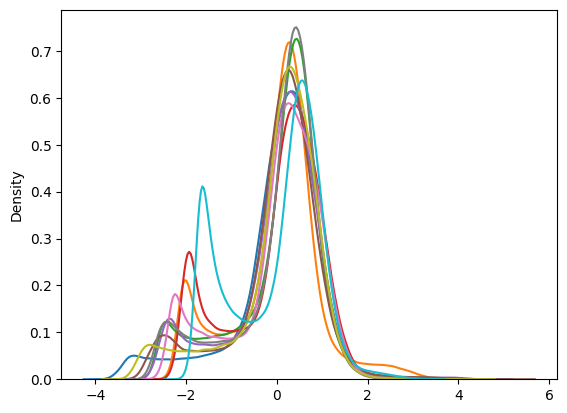

In [13]:
count = 0
for ind in test_dss[0]:
    print(".", end='')
    example = ind['image'][0]
    flat = example.view(-1)
    flat = flat[flat != 0]
    #sns.histplot(flat, kde=True, fill=False)
    sns.kdeplot(flat)
    #plt.yscale('log')
    #break
    # if count == 1:
    #     break
    # count += 1

..............................

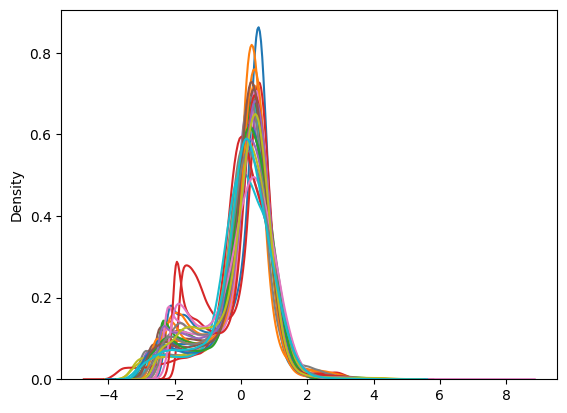

In [14]:
count = 0
for ind in test_dss[1]:
    print(".", end='')
    example = ind['image'][0]
    flat = example.view(-1)
    flat = flat[flat != 0]
    sns.kdeplot(flat)

..........

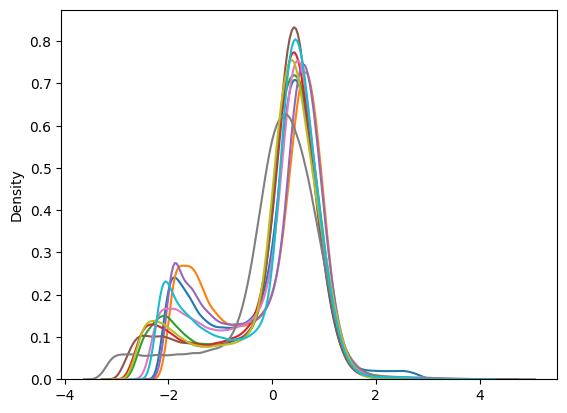

In [42]:
count = 0
for ind in test_dss[2]:
    print(".", end='')
    example = ind['image'][0]
    flat = example.view(-1)
    flat = flat[flat != 0]
    sns.kdeplot(flat)

..............................

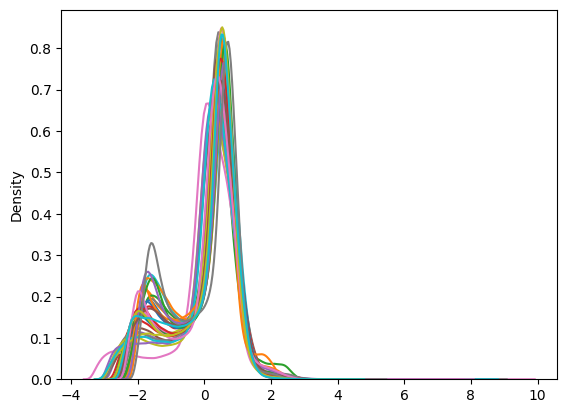

In [43]:
count = 0
for ind in test_dss[3]:
    print(".", end='')
    example = ind['image'][0]
    flat = example.view(-1)
    flat = flat[flat != 0]
    sns.kdeplot(flat)

..............................

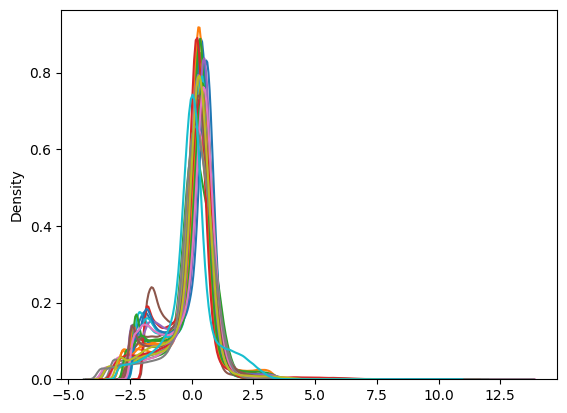

In [44]:
count = 0
for ind in test_dss[4]:
    print(".", end='')
    example = ind['image'][0]
    flat = example.view(-1)
    flat = flat[flat != 0]
    sns.kdeplot(flat)